## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline 
from matplotlib.ticker import FuncFormatter
import matplotlib.style as style

import seaborn as sns

# Set today's date
import datetime as dt
today = dt.datetime.today().strftime("%Y.%m.%d")

## Loading the Data

In [2]:
Train = pd.read_csv('Train.csv')
Riders = pd.read_csv('Riders.csv')
Train.head(2); Riders.head(2)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


## Merging the Training and Riders dataset

In [252]:
Combine_Train_Riders = pd.merge(Train, Riders,)
Combine_Train_Riders.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549


* ".head()" returns first five observations of the dataset. Unless specified.

# EDA
* Preparing a comprehensive exploratory data analysis (EDA) using the merged training dataset.

In [4]:
import pandas_profiling

In [5]:
Data_Profile = Combine_Train_Riders.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
rejected_variables = Data_Profile.get_rejected_variables(threshold=0.9)
print(Data_Profile)

## Data Insights
* The Summary of a DataFrame helps to understand the type of variable, data type and presence of null values.

In [6]:
# The size of Data set
print('The size of the data is :', Combine_Train_Riders.size)

# Show dimension of the merged data
print("Dimension: {}".format(Combine_Train_Riders.shape))

The size of the data is : 699633
Dimension: (21201, 33)


* The size of data is 699633 which is made up of the number of rows times the number of columns if DataFrame.
* The dataset comprises of 21201 observations and 33 chracteriestics,
* out of which one is dependent variable (Target - Time from Pickup to Arrival) and the remaining 32 are independent variables.

In [7]:
Combine_Train_Riders.columns.values 

array(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement_-_Day_of_Month',
       'Placement_-_Weekday_(Mo_=_1)', 'Placement_-_Time',
       'Confirmation_-_Day_of_Month', 'Confirmation_-_Weekday_(Mo_=_1)',
       'Confirmation_-_Time', 'Arrival_at_Pickup_-_Day_of_Month',
       'Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Arrival_at_Pickup_-_Time',
       'Pickup_-_Day_of_Month', 'Pickup_-_Weekday_(Mo_=_1)',
       'Pickup_-_Time', 'Arrival_at_Destination_-_Day_of_Month',
       'Arrival_at_Destination_-_Weekday_(Mo_=_1)',
       'Arrival_at_Destination_-_Time', 'Distance_(KM)', 'Temperature',
       'Precipitation_in_millimeters', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings'], dtype=object)

* Label of each Column

In [8]:
Combine_Train_Riders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 33 columns):
Order_No                                     21201 non-null object
User_Id                                      21201 non-null object
Vehicle_Type                                 21201 non-null object
Platform_Type                                21201 non-null int64
Personal_or_Business                         21201 non-null object
Placement_-_Day_of_Month                     21201 non-null int64
Placement_-_Weekday_(Mo_=_1)                 21201 non-null int64
Placement_-_Time                             21201 non-null object
Confirmation_-_Day_of_Month                  21201 non-null int64
Confirmation_-_Weekday_(Mo_=_1)              21201 non-null int64
Confirmation_-_Time                          21201 non-null object
Arrival_at_Pickup_-_Day_of_Month             21201 non-null int64
Arrival_at_Pickup_-_Weekday_(Mo_=_1)         21201 non-null int64
Arrival_at_Pickup_-_Time   

* Data has float, object and integer values
* Temperature and Precipitation in millimeters columns has null/missing values

## Summary Statistics

In [183]:
Target_Column = ['Time_from_Pickup_to_Arrival']
Predictors = list(set(list(Combine_Train_Riders.columns))-set(Target_Column))
Stat = Combine_Train_Riders.describe(include='all')
Stat= Stat.transpose()
Stat.to_csv('Descriptive_Statistics_in_Python.csv', index=False)
Stat.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_No,21201,21201,Order_No_17387,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User_Id,21201,3186,User_Id_393,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,21201,1,Bike,21201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_Type,21201,NaN,NaN,NaN,2.75218,0.625178,1,3,3,3,4
Personal_or_Business,21201,2,Business,17384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Placement_-_Day_of_Month,21201,NaN,NaN,NaN,15.6537,8.79892,1,8,15,23,31
Placement_-_Weekday_(Mo_=_1),21201,NaN,NaN,NaN,3.24008,1.5673,1,2,3,5,7
Placement_-_Time,21201,15686,12:51:03 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Confirmation_-_Day_of_Month,21201,NaN,NaN,NaN,15.6538,8.79889,1,8,15,23,31
Confirmation_-_Weekday_(Mo_=_1),21201,NaN,NaN,NaN,3.24022,1.56723,1,2,3,5,7


## Key Observations -

* Mean value is greater than the median value of each column represented by 50%(50th percentile) in row index except for the plaform type which state otherwise.
* Notably small differnece in 75th percentile and max values of predictors "Platform type", "Placement-Day of Month", "Placement-Weekday(Mo=1)", "Confirmation-Day of Month" and "Confirmation-Weekday(Mo=1)".
* Thus, observations 1 and 2 suggests that there are no extreme values/Outliers in our dataset.

## Understanding the Target Variable

In [10]:
Combine_Train_Riders['Time_from_Pickup_to_Arrival'].unique()

array([ 745, 2886, 2615, ..., 4467, 3153, 4515])

* Target variable/Dependent variable is discrete and numerical in nature.
* "Time from Pickup to Arrival" is the Time in seconds between 'Pickup' and 'Arrival at Destination'.

In [11]:
print('The Maximum seconds from Pickup to Arrival is : ', Combine_Train_Riders['Time_from_Pickup_to_Arrival'].max())
print('The Minimum seconds from Pickup to Arrival is : ', Combine_Train_Riders['Time_from_Pickup_to_Arrival'].min())

The Maximum seconds from Pickup to Arrival is :  7883
The Minimum seconds from Pickup to Arrival is :  1


In [12]:
Combine_Train_Riders['Time_from_Pickup_to_Arrival'].value_counts(sort=True)
#Combine_Train_Riders['Time from Pickup to Arrival'].value_counts(sort=True).tail(200)
#Combine_Train_Riders['Time from Pickup to Arrival'].value_counts(sort=True).head(2000)

2       143
3        97
4        66
5        56
7        37
1        37
6        36
8        29
10       25
1424     24
9        21
1057     20
885      20
1169     19
705      19
1142     19
1046     19
943      19
917      19
1097     19
1093     18
719      18
1058     18
864      18
1393     18
859      18
1207     18
771      17
978      17
1282     17
       ... 
3173      1
3018      1
2794      1
3221      1
4809      1
3237      1
3253      1
3285      1
5350      1
2981      1
4982      1
2661      1
3210      1
3386      1
4742      1
4758      1
3306      1
4790      1
3226      1
4822      1
3194      1
2933      1
3178      1
3146      1
4886      1
2869      1
3050      1
2917      1
4966      1
4154      1
Name: Time_from_Pickup_to_Arrival, Length: 4067, dtype: int64

* This tells us vote count of each Time of arrival in descending order.
* "Time from Pickup to Arrival" has most values concentrated in the categories (in sec) 2, 3, 4 and 5.
* Most of the time from pickup to destination has vote count below 15

## Data Visualisation

## To check missing values

In [13]:
import missingno as mnso

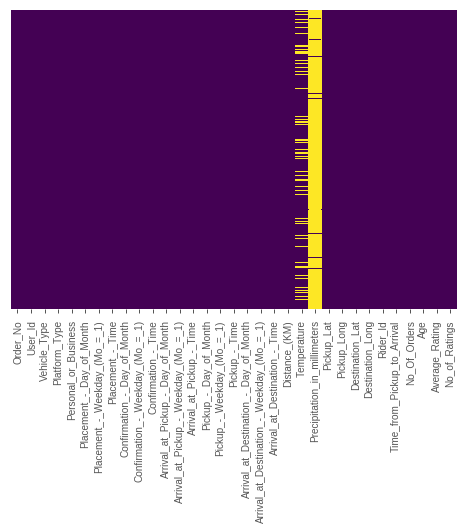

In [14]:
import matplotlib.style as style
style.use('ggplot')
sns.heatmap(Combine_Train_Riders.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Dataset has missing values. They are Temperature and Precipitation in millimeters Variables
* These are noticed in figure represented by different colour shade on the purple background.
* The missing values are continuous values (Numeric values).

### Checking the total number of Missing values in the dataset

In [15]:
# Total number of missing values in the data 
Missing_values = Combine_Train_Riders.isnull().sum()
print('The missing values is show below :', Missing_values)

The missing values is show below : Order_No                                         0
User_Id                                          0
Vehicle_Type                                     0
Platform_Type                                    0
Personal_or_Business                             0
Placement_-_Day_of_Month                         0
Placement_-_Weekday_(Mo_=_1)                     0
Placement_-_Time                                 0
Confirmation_-_Day_of_Month                      0
Confirmation_-_Weekday_(Mo_=_1)                  0
Confirmation_-_Time                              0
Arrival_at_Pickup_-_Day_of_Month                 0
Arrival_at_Pickup_-_Weekday_(Mo_=_1)             0
Arrival_at_Pickup_-_Time                         0
Pickup_-_Day_of_Month                            0
Pickup_-_Weekday_(Mo_=_1)                        0
Pickup_-_Time                                    0
Arrival_at_Destination_-_Day_of_Month            0
Arrival_at_Destination_-_Weekday_(Mo_=_1)      

In [16]:
# Summing the missing values
Total_missing = Combine_Train_Riders.isnull().sum().sum()
print('The Total number of missing values is: ', Total_missing)

The Total number of missing values is:  25015


In [17]:
# The Percentage of missing values in the dataset
Percent_Missing = Combine_Train_Riders.isna().mean().round(4) * 100
print('The percentage of missing values in the dataset is:', Percent_Missing)

The percentage of missing values in the dataset is: Order_No                                      0.00
User_Id                                       0.00
Vehicle_Type                                  0.00
Platform_Type                                 0.00
Personal_or_Business                          0.00
Placement_-_Day_of_Month                      0.00
Placement_-_Weekday_(Mo_=_1)                  0.00
Placement_-_Time                              0.00
Confirmation_-_Day_of_Month                   0.00
Confirmation_-_Weekday_(Mo_=_1)               0.00
Confirmation_-_Time                           0.00
Arrival_at_Pickup_-_Day_of_Month              0.00
Arrival_at_Pickup_-_Weekday_(Mo_=_1)          0.00
Arrival_at_Pickup_-_Time                      0.00
Pickup_-_Day_of_Month                         0.00
Pickup_-_Weekday_(Mo_=_1)                     0.00
Pickup_-_Time                                 0.00
Arrival_at_Destination_-_Day_of_Month         0.00
Arrival_at_Destination_-_Weekd

## To Check for Correlation

### Correlation Matrix

In [18]:
Corr_Matrix = Combine_Train_Riders.corr()
Corr_Matrix.head(5)

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Platform_Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,...,-0.055948,-0.002742,0.021327,0.006319,0.043924,-0.003827,0.024060,-0.074029,-0.014664,-0.031886
Placement_-_Day_of_Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,...,-0.204143,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008096,-0.000107,0.012790,-0.001709
Placement_-_Weekday_(Mo_=_1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,...,-0.050592,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.024226,-0.015475,-0.006834,-0.025747
Confirmation_-_Day_of_Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,...,-0.204143,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712
Confirmation_-_Weekday_(Mo_=_1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,...,-0.050592,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768


* At a glance, it difficult to see all rows and columns and still pretty hard to understand 
* so we’re going to do some plotting using seaborn heatmap

### Heatmap

Text(0.5, 1.0, 'Heatmap')

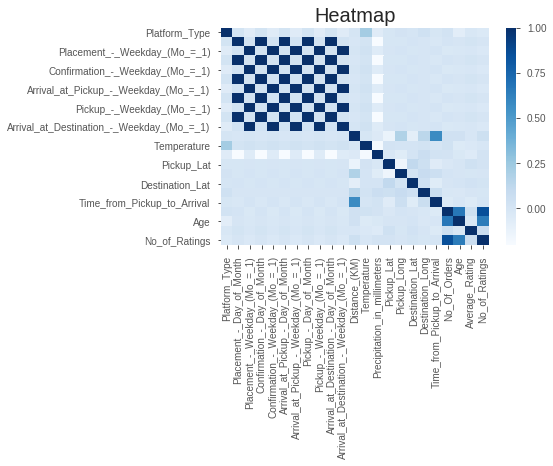

In [19]:
import matplotlib.style as style
style.use('ggplot')

plt.figure(figsize=(6,4))
sns.heatmap(Corr_Matrix,cmap='Blues',annot=False) 
plt.title('Heatmap', fontsize=20)

* Dark shades represents positive correlation while lighter shades represents negative correlation.
* If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

### Quality correlation matrix

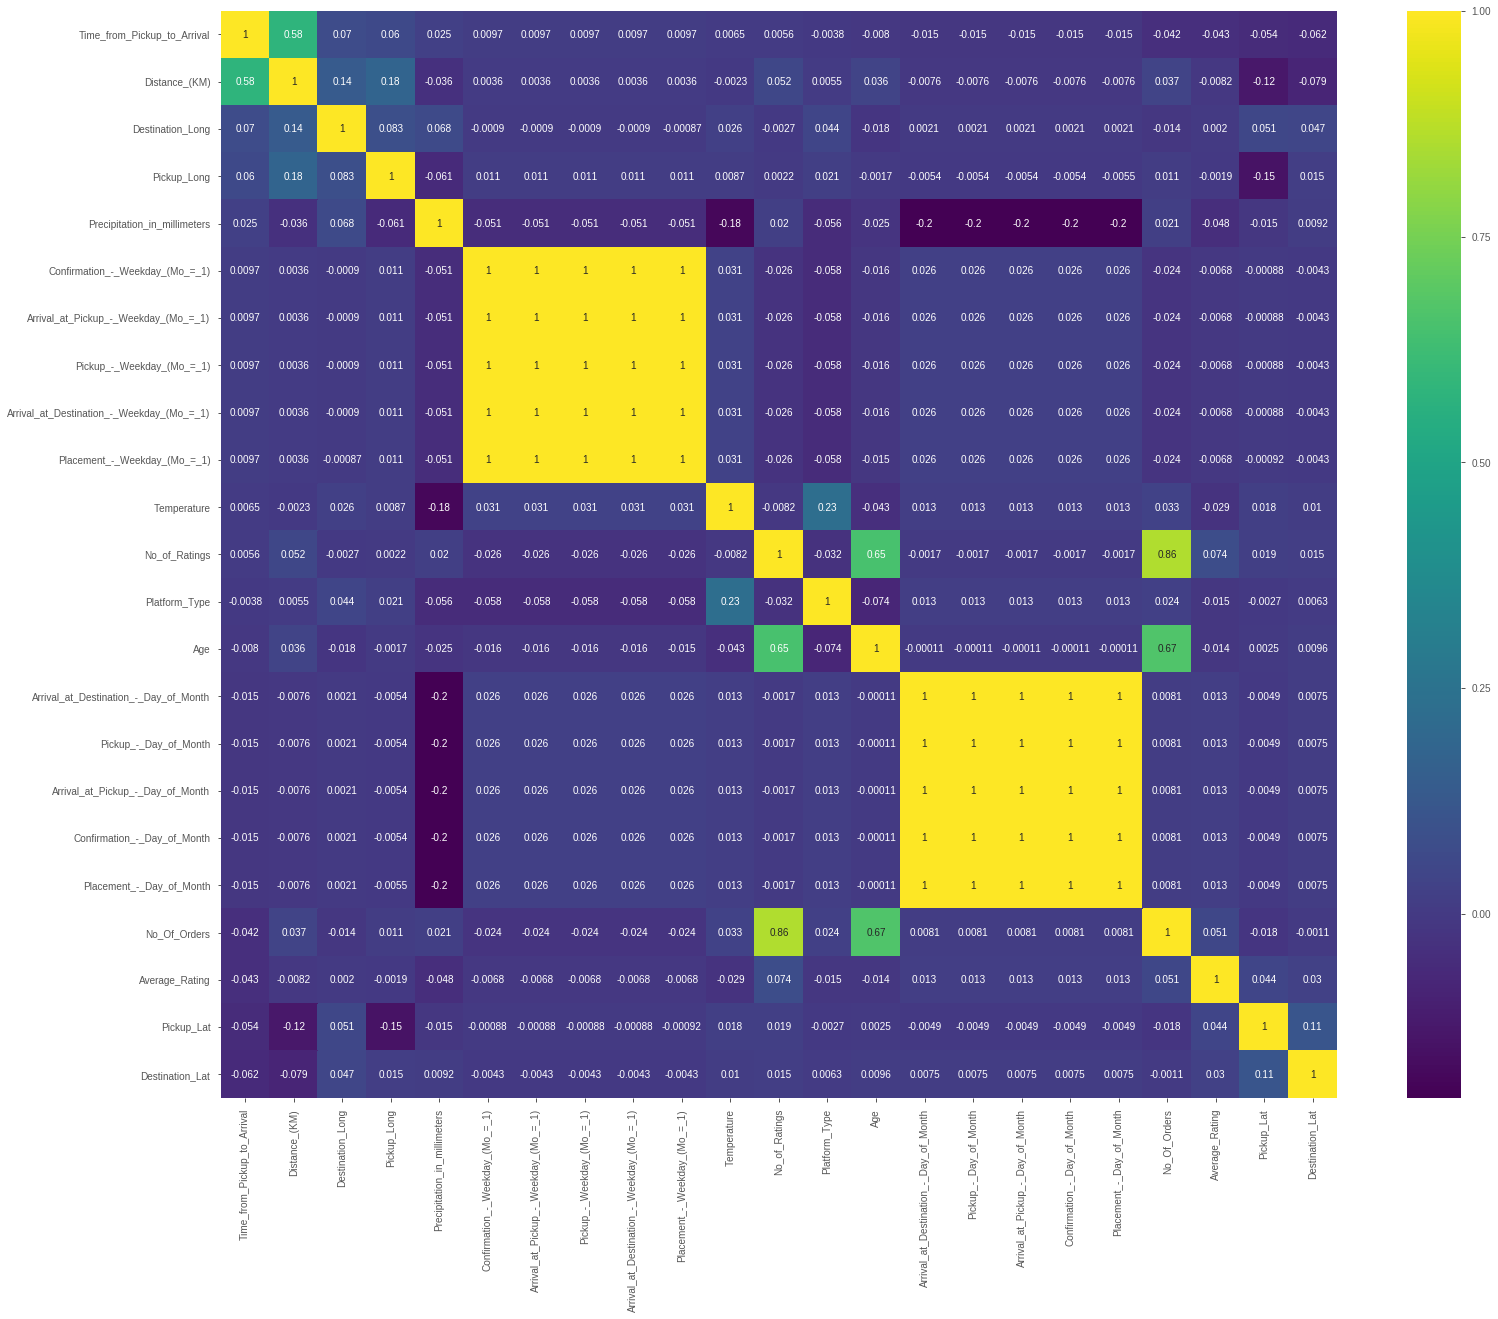

In [20]:
import matplotlib.style as style
style.use('ggplot')

k = 33  #number of variables for heatmap
cols = Corr_Matrix.nlargest(k, 'Time_from_Pickup_to_Arrival')['Time_from_Pickup_to_Arrival'].index
cm = Combine_Train_Riders[cols].corr()
plt.figure(figsize=(25,20))
sns.heatmap(cm, annot=True, cmap = 'viridis')

* Here we can infer that all variables with "weekday (Mon=1)" has strong positive correlation with each other, whereas all variables with "Day of Month" also has strong positive correlation with each other.
* "No of Orders" and "No of Ratings" has almost strong positive correlation with each other.
* "Distance (Km)" has almost strong positive correlation with "Time from Pickup to Arrrival".
* "Precipitation in millimeters" has no correlation with the Target variable. We can infer that it has no linear relationship with the target variable
* However it is safe to drop this feature since we want to apply Linear Regression model to the dataset.

## Dealing with Missing Values

In [21]:
New_DataFrame = Combine_Train_Riders

In [22]:
# Dropping the Precipitation in millimeters
# New_DataFrame = Combine_Train_Riders.fillna('Precipitation_in_millimeters', axis=True)

In [23]:
New_DataFrame['Precipitation_in_millimeters'].fillna(0, inplace = True)

* We filled the rows with null values (Precipitation in millimeters) with zero (0).
* https://weatherspark.com/y/99550/Average-Weather-in-Nairobi-Kenya-Year-Round#Sections-Precipitation
* Not all days it will rain or there will be snow. So we assumed NaN be either it did not rain nor snowed 

### Mean Imputation

In [24]:
New_DataFrame['Temperature'].fillna((New_DataFrame['Temperature'].mean()), inplace=True)
New_DataFrame.Temperature.head(10)

0    20.400000
1    24.500000
2    24.700000
3    15.200000
4    19.200000
5    23.258889
6    15.200000
7    24.500000
8    24.300000
9    27.500000
Name: Temperature, dtype: float64

* Replace null values of the Temperature with mean on the entire column for numeric columns.
* This is easy to implement and understandable (seems resonable).

## To check Outliers

In [25]:
Numeric_Data = New_DataFrame._get_numeric_data()
Numeric_Data.head()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,18,5,18,5,18,5,18,5,18,...,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,31,5,31,5,31,5,31,5,31,...,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,2,2,2,2,2,2,2,2,2,...,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,22,2,22,2,22,2,22,2,22,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


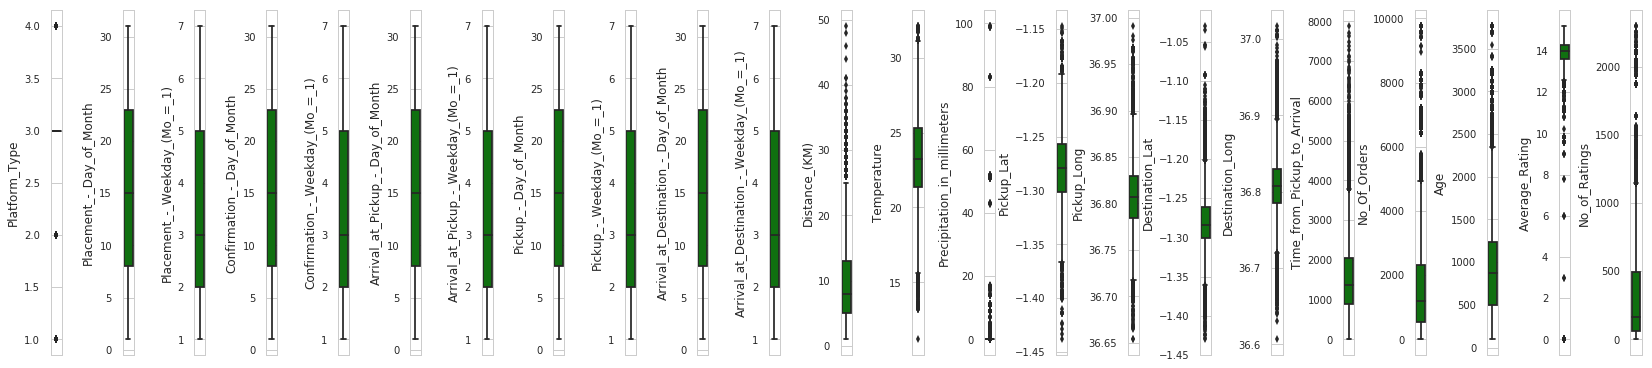

In [154]:
l = Numeric_Data.columns.values
number_of_columns = 23
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Numeric_Data[l[i]],color='green',orient='v')
    plt.tight_layout()

In [166]:
def detect_outlier(data_1):
    
    threshold=1
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
           
            
    return outliers

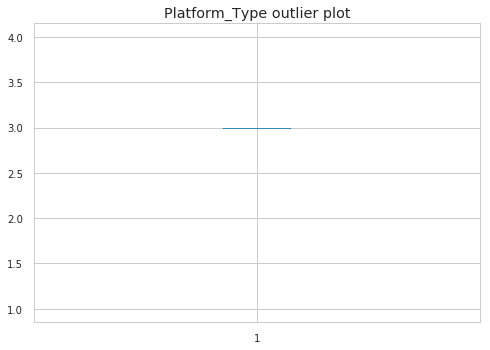

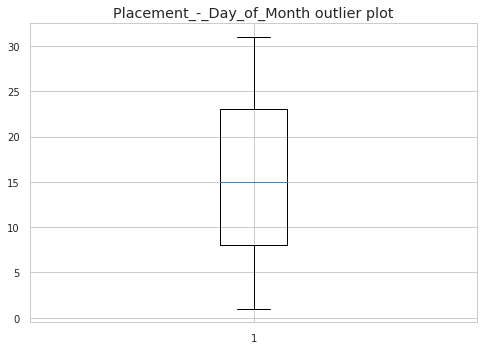

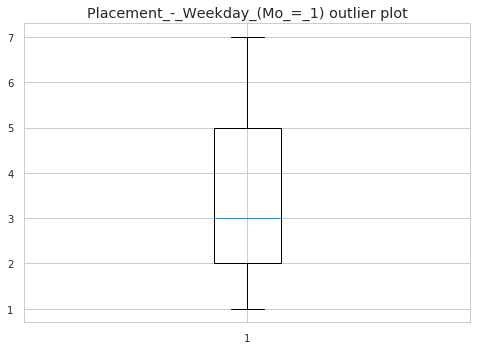

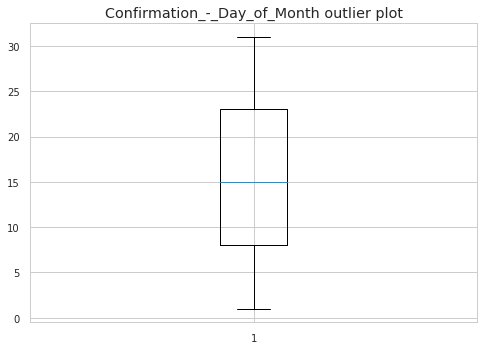

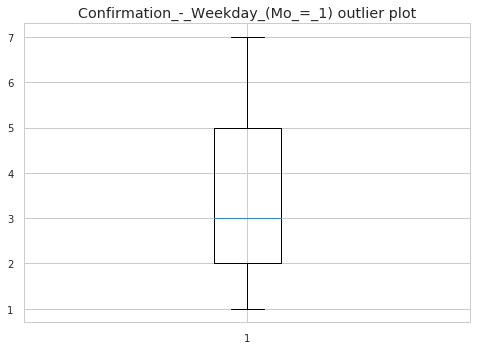

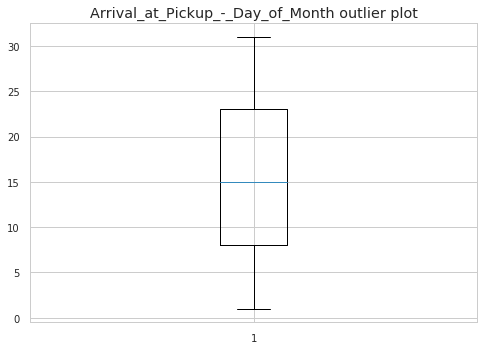

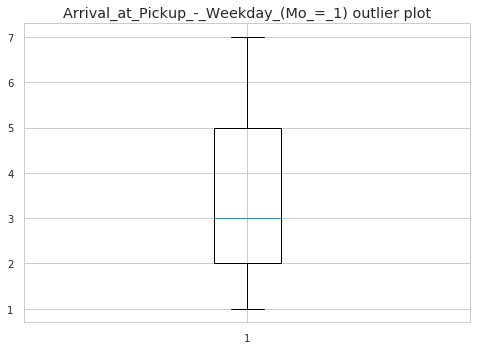

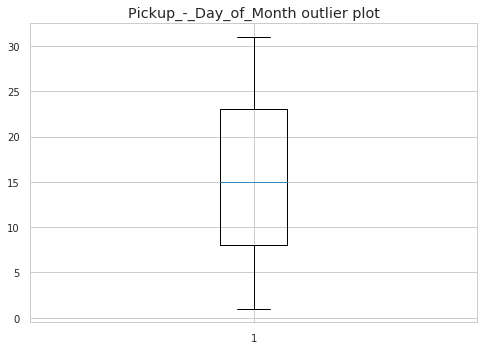

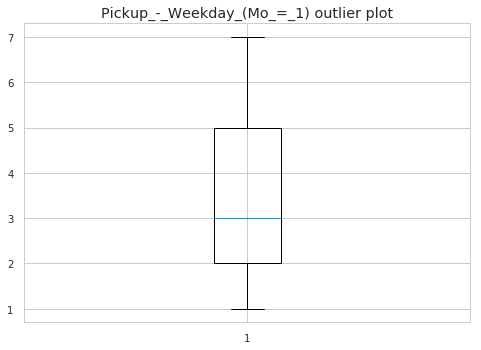

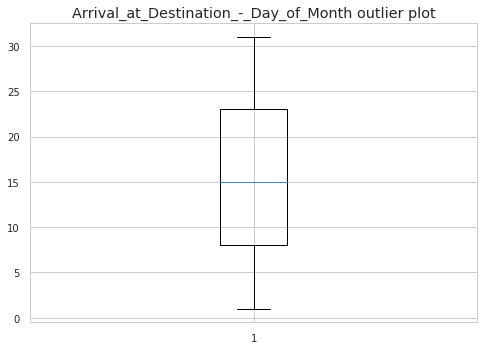

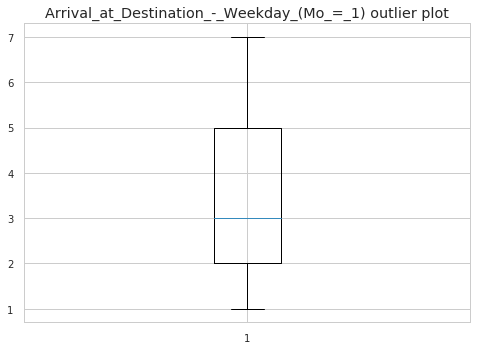

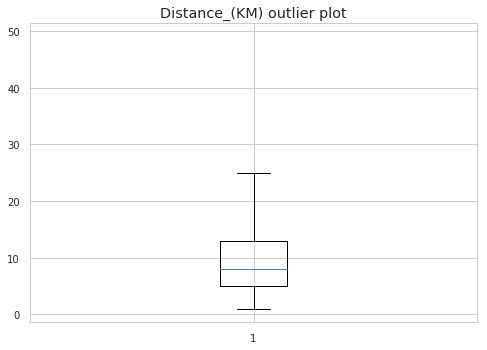

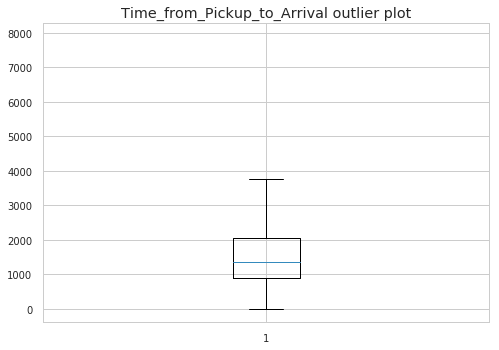

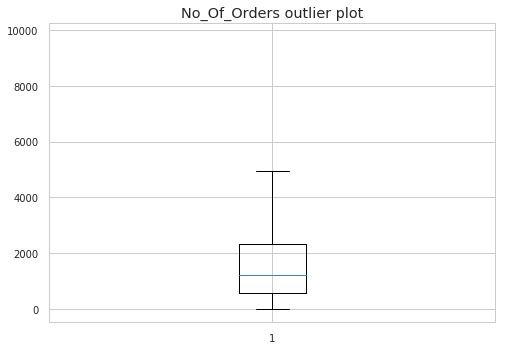

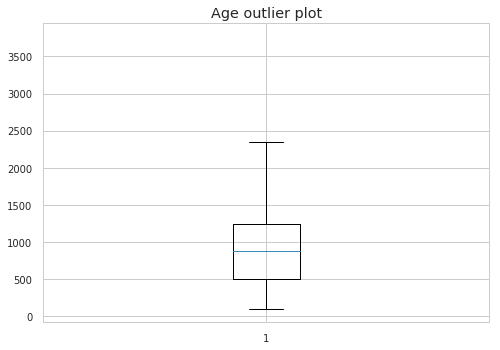

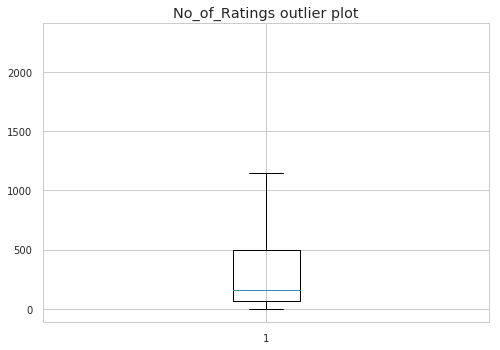

In [167]:
fig=plt.figure()

for i  in range(0,len(New_DataFrame.columns)):
    outliers=[]
   
    if New_DataFrame[New_DataFrame.columns[i]].dtypes== np.int64 or New_DataFrame[New_DataFrame.columns[i]].dtypes== np.int64  :
        
        outliers=detect_outlier(New_DataFrame.iloc[:,i])
        if len(outliers)>0:
                   
            ax = plt.subplot(1,1,1)
            #Variable
            ax.boxplot(New_DataFrame[list(New_DataFrame.columns)[i]])
            plt.title(list(New_DataFrame.columns)[i] + " outlier plot")
            plt.show()

## KDE

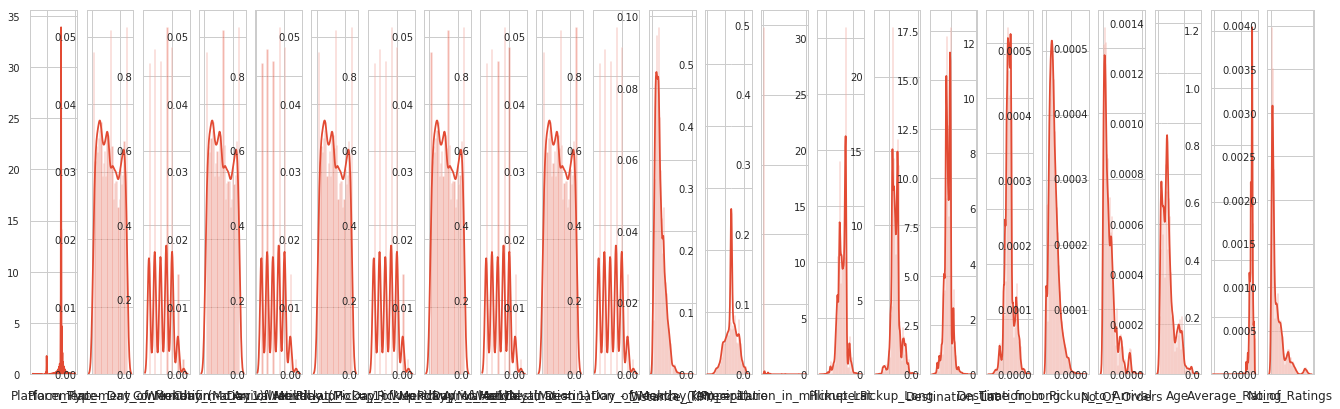

In [156]:
plt.figure(figsize=(number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    chart=sns.distplot(Numeric_Data[l[i]],kde=True) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

# FEATURE ENGINEERING

In [28]:
Featured_Data = New_DataFrame.copy()
Featured_Data.head(2)

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549


* Make a copy of the New DataFrame.
* The New DataFrame will needed for further analysis without the New features which will be created

## New Feature Creating - Placement Time of Day

* Creating a new feature (_Placement Time of Day_) for "Placement of Time" by converting it to a timestamp

In [29]:
# Import datetime Library
from datetime import datetime as dt

In [30]:
Featured_Data['Placement_-_Time'] = Featured_Data['Placement_-_Time'].apply(lambda time: dt.strptime(time,'%I:%M:%S %p'))
Featured_Data['Placement_-_Time'].head(5)

0   1900-01-01 09:35:46
1   1900-01-01 15:41:17
2   1900-01-01 12:51:41
3   1900-01-01 07:12:10
4   1900-01-01 10:40:58
Name: Placement_-_Time, dtype: datetime64[ns]

* Now, we extract the hour in which the order was made from the timestamp

In [31]:
Featured_Data['Placement Time of Day'] = Featured_Data['Placement_-_Time'].dt.hour
print(Featured_Data['Placement Time of Day'].min())
print(Featured_Data['Placement Time of Day'].max())

0
22


* We categorize the hour into which time of the day the order was made. 
* Thus either, Early Morning, Morning, Noon, Evening and Late Night

In [32]:
# Definition to group hour into Early Morning through to Late Night
def get_part_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
    
# Appending the Categorized get_part_hr onto the Extracted hour from the timdestamp
Featured_Data['Placement Time of Day'] = Featured_Data['Placement Time of Day'].apply(get_part_hr)

In [33]:
Featured_Data['Placement Time of Day'].head(10)

0          Morning
1             Noon
2             Noon
3    Early Morning
4          Morning
5             Noon
6          Morning
7             Noon
8             Noon
9             Noon
Name: Placement Time of Day, dtype: object

### We Create new features using the  same idea for all Time 

## New Feature Creating  - Confirmation Time of Day

In [34]:
Featured_Data['Confirmation_-_Time'] = Featured_Data['Confirmation_-_Time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
Featured_Data['Confirmation Time of Day'] = Featured_Data['Confirmation_-_Time'].dt.hour

In [35]:
# Definition to group hour into Early Morning through to Late Night
def get_part_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
    
# Storing the Categorized get_part_hr onto the Extracted hour from the timdestamp
Featured_Data['Confirmation Time of Day'] = Featured_Data['Confirmation Time of Day'].apply(get_part_hr)

In [36]:
Featured_Data['Confirmation Time of Day'].head(10)

0          Morning
1             Noon
2             Noon
3    Early Morning
4          Morning
5             Noon
6          Morning
7             Noon
8             Noon
9             Noon
Name: Confirmation Time of Day, dtype: object

## New Feature Creating - Arrival at Pickup Time of Day

In [37]:
Featured_Data['Arrival_at_Pickup_-_Time'] = Featured_Data['Arrival_at_Pickup_-_Time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
Featured_Data['Arrival at Pickup Time of Day'] = Featured_Data['Arrival_at_Pickup_-_Time'].dt.hour

In [38]:
# Definition to group hour into Early Morning through to Late Night
def get_part_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
    
# Storing the Categorized get_part_hr onto the Extracted hour from the timdestamp
Featured_Data['Arrival at Pickup Time of Day'] = Featured_Data['Arrival at Pickup Time of Day'].apply(get_part_hr)

In [39]:
Featured_Data['Arrival at Pickup Time of Day'].head(10)

0          Morning
1             Noon
2             Noon
3    Early Morning
4          Morning
5             Noon
6          Morning
7             Noon
8             Noon
9             Noon
Name: Arrival at Pickup Time of Day, dtype: object

## New Feature Creating - Arrival at Destination Time of Day

In [40]:
Featured_Data['Arrival_at_Destination_-_Time'] = Featured_Data['Arrival_at_Destination_-_Time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
Featured_Data['Arrival at Destination Time of Day'] = Featured_Data['Arrival_at_Destination_-_Time'].dt.hour

In [41]:
# Definition to group hour into Early Morning through to Late Night
def get_part_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
    
# Storing the Categorized get_part_hr onto the Extracted hour from the timdestamp
Featured_Data['Arrival at Destination Time of Day'] = Featured_Data['Arrival at Destination Time of Day'].apply(get_part_hr)

In [42]:
Featured_Data['Arrival at Destination Time of Day'].head(10)

0          Morning
1          Evening
2             Noon
3    Early Morning
4          Morning
5             Noon
6          Morning
7          Evening
8             Noon
9             Noon
Name: Arrival at Destination Time of Day, dtype: object

## New Feature Creating - Pickup Time of Day

In [43]:
Featured_Data['Pickup_-_Time'] = Featured_Data['Pickup_-_Time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
Featured_Data['Pickup Time of Day'] = Featured_Data['Pickup_-_Time'].dt.hour

In [44]:
# Definition to group hour into Early Morning through to Late Night
def get_part_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
    
# Storing the Categorized get_part_hr onto the Extracted hour from the timdestamp
Featured_Data['Pickup Time of Day'] = Featured_Data['Pickup Time of Day'].apply(get_part_hr)

In [45]:
Featured_Data['Pickup Time of Day'].head(10)

0          Morning
1             Noon
2             Noon
3    Early Morning
4          Morning
5             Noon
6          Morning
7             Noon
8             Noon
9             Noon
Name: Pickup Time of Day, dtype: object

## New Feature Creating - Re-Grouping the variable "...Weeday (Mo=1)" into Weekday and Weekend

* Note that, Weekday starts from Monday = 1 through to Friday = 5 and 
* Weekend starts from Saturday = 6 and Sunday = 7

### New Feature = Actual Day of Placement

In [46]:
Featured_Data['Actual Day of Placement'] = np.where(Featured_Data['Placement_-_Weekday_(Mo_=_1)']< 6,
                                                   'Weekday','Weekend')
Featured_Data['Actual Day of Placement'].head()

0    Weekday
1    Weekday
2    Weekday
3    Weekday
4    Weekday
Name: Actual Day of Placement, dtype: object

### New Feature = Actual Day of Confirmation

In [47]:
Featured_Data['Actual Day of Confirmation'] = np.where(Featured_Data['Confirmation_-_Weekday_(Mo_=_1)']< 6,
                                                       'Weekday','Weekend')
Featured_Data['Actual Day of Confirmation'].tail()

21196    Weekday
21197    Weekday
21198    Weekday
21199    Weekday
21200    Weekday
Name: Actual Day of Confirmation, dtype: object

### New Feature = Actual Day of Pickup

In [48]:
Featured_Data['Actual Day of Pickup'] = np.where(Featured_Data['Pickup_-_Weekday_(Mo_=_1)'] < 6, 
                                       'Weekday', 'Weekend')
Featured_Data['Actual Day of Pickup'].head()

0    Weekday
1    Weekday
2    Weekday
3    Weekday
4    Weekday
Name: Actual Day of Pickup, dtype: object

### New Feature = Actual Day of Arrival at Destination

In [49]:
Featured_Data['Actual Day of Arrival at Destination'] = np.where(Featured_Data['Arrival_at_Destination_-_Weekday_(Mo_=_1)'] < 6, 
                                                                 'Weekday', 'Weekend')
Featured_Data['Actual Day of Arrival at Destination'].head()

0    Weekday
1    Weekday
2    Weekday
3    Weekday
4    Weekday
Name: Actual Day of Arrival at Destination, dtype: object

### New Feature = Actual Day of Arrival at Pickup

In [50]:
Featured_Data['Actual Day of Arrival at Pickup'] = np.where(Featured_Data['Arrival_at_Pickup_-_Weekday_(Mo_=_1)'] < 6, 
                                                            'Weekday', 'Weekend')
Featured_Data['Actual Day of Arrival at Pickup'].tail()

21196    Weekday
21197    Weekday
21198    Weekday
21199    Weekday
21200    Weekday
Name: Actual Day of Arrival at Pickup, dtype: object

### New Feature = Proximity of Pickup and Destination points
 * using Central Business District (CBD) of Nairobi as Reference

In [51]:
import sys
!{sys.executable} -m pip install geopy

In [52]:
#import webbrowser
#webbrowser.open("https://en.wikipedia.org/wiki/Upper_Hill,_Nairobi")

True

### For Pickup Point

In [53]:
# importing geodesic from geopy 
from geopy.distance import geodesic

# Creating a column for CBD proximity and populating it with Nan
Featured_Data['Proximity to Pickup Point'] = np.nan

# Latitude and longitude for Central Business District of Nairobi
CBD_Nairobi=(-1.299719, 36.816097)

# Iterating through Data to compute for Distance(km)
for i, row in Featured_Data.iterrows():
    Featured_Data.loc[i, 'Proximity to Pickup Point'] = geodesic((Featured_Data.loc[i, 'Pickup_Lat'],
                                                                  Featured_Data.loc[i, 'Pickup_Long']),CBD_Nairobi).km 

### For Destination Point

In [54]:
# importing geodesic from geopy 
from geopy.distance import geodesic

#Creating a column for CBD proximity and populating it with Nan
Featured_Data['Proximity to Destination'] = np.nan

# Latitude and longitude for Central Business District of Nairobi
CBD_Nairobi=(-1.299719, 36.816097)

# Iterating through Data to compute for Distance (KM)
for i, row in Featured_Data.iterrows():
    Featured_Data.loc[i, 'Proximity to Destination'] = geodesic((Featured_Data.loc[i, 'Destination_Lat'],
                                                                  Featured_Data.loc[i, 'Destination_Long']),CBD_Nairobi).km 

### New Feature = Grouping Temperature into Average High, Average Low and Normal 

* https://weatherspark.com/y/99550/Average-Weather-in-Nairobi-Kenya-Year-Round#Sections-Temperature
* The hottest day of the year is February 26 in Nairobi-Kenya, with an average high of 27°C and low of 15°C. 
* The coldest day of the year is July 14 n Nairobi-Kenya, with an average low of 12°C and high of 22°C. 

In [55]:
Temperature_Deg = []

# Using a for loop to populate the list
for Degree in Featured_Data['Temperature']:
    if (Degree >= 15) and (Degree <= 27):
        Temperature_Deg.append('Average High Temperature')
    elif (Degree >= 12) and (Degree <= 22 ):
        Temperature_Deg.append('Average Low Temperature')
    else:
        Temperature_Deg.append('Normal Temperature')

# Storing the data as a column in Featured_Data
Featured_Data['Temperature Condition'] = Temperature_Deg

### New Feature = Grouping Day of Month into Weeks

## For Placement Day of Month

In [56]:
# Create a list to store the data
Place_Day_Month = []

# Using a for loop to populate the list
for Each_Day in Featured_Data['Placement_-_Day_of_Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Place_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Place_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Place_Day_Month.append('3rd Week')
    else:
        Place_Day_Month.append('4th Week')
            
# Storing the data as a column in Featured_Data
Featured_Data['Placement_Day into Weeks'] = Place_Day_Month

## For Confirmation Day of Month

In [57]:
# Create a list to store the data
Confirm_Day_Month = []

# Using a for loop to populate the list
for Each_Day in Featured_Data['Confirmation_-_Day_of_Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Confirm_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Confirm_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Confirm_Day_Month.append('3rd Week')
    else:
        Confirm_Day_Month.append('4th Week')
            
# Storing the data as a column in Featured_Data
Featured_Data['Confirmation_Day into Weeks'] = Confirm_Day_Month

### For Arrival at Pickup Day of Month 

In [58]:
# Create a list to store the data
Arrival_Pickup_Day_Month = []

# Using a for loop to populate the list
for Each_Day in Featured_Data['Arrival_at_Pickup_-_Day_of_Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Arrival_Pickup_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Arrival_Pickup_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Arrival_Pickup_Day_Month.append('3rd Week')
    else:
        Arrival_Pickup_Day_Month.append('4th Week')
            
# Storing the data as a column in Featured_Data
Featured_Data['Arrival_Pickup_Day into Weeks'] = Arrival_Pickup_Day_Month

### For Pickup Day of Month

In [59]:
# Create a list to store the data
Pickup_Day_Month = []

# Using a for loop to populate the list
for Each_Day in Featured_Data['Pickup_-_Day_of_Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Pickup_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Pickup_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Pickup_Day_Month.append('3rd Week')
    else:
        Pickup_Day_Month.append('4th Week')
            
# Storing the data as a column in Featured_Data
Featured_Data['Pickup_Day into Weeks'] = Pickup_Day_Month

### For Arrival at Destination Day of Month

In [60]:
# Create a list to store the data
Arrival_Destn_Day_Month = []

# Using a for loop to populate the list
for Each_Day in Featured_Data['Arrival_at_Destination_-_Day_of_Month']:
    if (Each_Day > 0 and Each_Day <=7):
        Arrival_Destn_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Arrival_Destn_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Arrival_Destn_Day_Month.append('3rd Week')
    else:
        Arrival_Destn_Day_Month.append('4th Week')
            
# Storing the data as a column in Featured_Data
Featured_Data['Arrival_Destination_Day into Weeks'] = Arrival_Destn_Day_Month

### Checking to see the average delivery time for weekdays and weekends for Placement of order

In [82]:
Weekend_Weekday = Featured_Data.groupby(['Actual Day of Placement'], as_index=False).mean()
Weekend_Weekday[['Actual Day of Placement','Time_from_Pickup_to_Arrival']].sort_values('Time_from_Pickup_to_Arrival',ascending=False)

,Actual Day of Placement,Time_from_Pickup_to_Arrival
0,Weekday,1562.609337
1,Weekend,1477.017033


* From the result above, we can infer that Weekend deliveries of orders are faster than deliveries made on Weekdays.

## Checking to see the average delivery time for weeks of month for pick ups

In [85]:
Pickup_Week = Featured_Data.groupby(['Pickup_Day into Weeks'], as_index=False).mean()
Pickup_Week[['Pickup_Day into Weeks','Time_from_Pickup_to_Arrival']].sort_values('Time_from_Pickup_to_Arrival',ascending=False)

,Pickup_Day into Weeks,Time_from_Pickup_to_Arrival
1,2nd Week,1589.452235
0,1st Week,1558.922781
2,3rd Week,1544.737104
3,4th Week,1529.274536


### Checking to see the average delivery time for orders Placed in the Early Morning to Late Night

In [87]:
Placement_Day_Time = Featured_Data.groupby(['Placement Time of Day'], as_index=False).mean()
Placement_Day_Time[['Placement Time of Day','Time_from_Pickup_to_Arrival']].sort_values('Time_from_Pickup_to_Arrival',ascending=False)

,Placement Time of Day,Time_from_Pickup_to_Arrival
5,Noon,1570.260299
3,Morning,1556.264176
0,Early Morning,1487.088725
1,Evening,1483.903955
4,Night,806.846154
2,Late Night,5.000000


* we can infer that, orders placed in the afternoon takes much time to be delivered than other time of day.
*  Late Night Orders has the least Estimated time of Arrival (ETA)

In [225]:
Featured_Data.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Actual Day of Arrival at Destination,Actual Day of Arrival at Pickup,Proximity to Pickup Point,Proximity to Destination,Temperature Condition,Placement_Day into Weeks,Confirmation_Day into Weeks,Arrival_Pickup_Day into Weeks,Pickup_Day into Weeks,Arrival_Destination_Day into Weeks
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,1900-01-01 09:35:46,9,5,...,Weekday,Weekday,2.549607,1.520355,Average High Temperature,2nd Week,2nd Week,2nd Week,2nd Week,2nd Week
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,1900-01-01 15:41:17,18,5,...,Weekday,Weekday,4.343066,11.636240,Average High Temperature,3rd Week,3rd Week,3rd Week,3rd Week,3rd Week
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,1900-01-01 12:51:41,31,5,...,Weekday,Weekday,6.202649,2.918344,Average High Temperature,4th Week,4th Week,4th Week,4th Week,4th Week
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,1900-01-01 07:12:10,2,2,...,Weekday,Weekday,6.617213,8.569265,Average High Temperature,1st Week,1st Week,1st Week,1st Week,1st Week
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,1900-01-01 10:40:58,22,2,...,Weekday,Weekday,3.452256,7.086304,Average High Temperature,3rd Week,3rd Week,3rd Week,3rd Week,3rd Week


## Feature Selection
### How we performed feature selection?

* We dropped some features which we deemed it not to have any influence with the Target Variable
* We apply Label Encoder to the Categorical Variables.
* We identified features with low variance. Thus, the features that have constant value or do not have much variability. These features may not help with predictive task and hence can be dropped.
* Again, we find the multicolinearity between the input variables. Presence of multicolinear features inflate the standard error.

*We used Variance Inflation Factor(VIF) to indentify the multicolinearity. VIF measures the standard error of the estimate of the coefficient inflated due to multicollinearity.*

### Dropping the Order No, User Id and Vehicle Type

In [96]:
New_Featured_Data = Featured_Data.drop(["Order_No","User_Id","Vehicle_Type"], axis=1)

### Selecting the Categorical Variable (Objects) and apply Encoding

In [104]:
New_Categ_Feature = New_Featured_Data.select_dtypes(include=['object'])
New_Categ_Feature.set_index('Rider_Id', inplace=True)
New_Categ_Feature.head(3)

,Personal_or_Business,Placement Time of Day,Confirmation Time of Day,Arrival at Pickup Time of Day,Arrival at Destination Time of Day,Pickup Time of Day,Actual Day of Placement,Actual Day of Confirmation,Actual Day of Pickup,Actual Day of Arrival at Destination,Actual Day of Arrival at Pickup,Temperature Condition,Placement_Day into Weeks,Confirmation_Day into Weeks,Arrival_Pickup_Day into Weeks,Pickup_Day into Weeks,Arrival_Destination_Day into Weeks
Rider_Id,,,,,,,,,,,,,,,,,
Rider_Id_432,Business,Morning,Morning,Morning,Morning,Morning,Weekday,Weekday,Weekday,Weekday,Weekday,Average High Temperature,2nd Week,2nd Week,2nd Week,2nd Week,2nd Week
Rider_Id_432,Personal,Noon,Noon,Noon,Evening,Noon,Weekday,Weekday,Weekday,Weekday,Weekday,Average High Temperature,3rd Week,3rd Week,3rd Week,3rd Week,3rd Week
Rider_Id_432,Business,Noon,Noon,Noon,Noon,Noon,Weekday,Weekday,Weekday,Weekday,Weekday,Average High Temperature,4th Week,4th Week,4th Week,4th Week,4th Week


### Encoding Variables

In [116]:
Encod_Cate_Feature = pd.get_dummies(New_Categ_Feature)

In [117]:
Encod_Cate_Feature.reset_index(level=['Rider_Id'], inplace=True)

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,9,5,9,5,9,5,9,5,9,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,18,5,18,5,18,5,18,5,18,...,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
2,3,31,5,31,5,31,5,31,5,31,...,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
3,3,2,2,2,2,2,2,2,2,2,...,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
4,2,22,2,22,2,22,2,22,2,22,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


## Concatenating The Encoded with Original data

In [129]:
Featured_DateFrame = pd.concat([Encod_Cate_Feature, Numeric_Data], axis=1)
Featured_DateFrame.set_index('Rider_Id', inplace=True)
Featured_DateFrame.head()

,Personal_or_Business_Business,Personal_or_Business_Personal,Placement Time of Day_Early Morning,Placement Time of Day_Evening,Placement Time of Day_Late Night,Placement Time of Day_Morning,Placement Time of Day_Night,Placement Time of Day_Noon,Confirmation Time of Day_Early Morning,Confirmation Time of Day_Evening,...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Rider_Id,,,,,,,,,,,,,,,,,,,,,
Rider_Id_432,1,0,0,0,0,1,0,0,0,0,...,0.0,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
Rider_Id_432,0,1,0,0,0,0,0,1,0,0,...,0.0,-1.326774,36.787807,-1.356237,36.904295,2886,1637,1309,13.8,549
Rider_Id_432,1,0,0,0,0,0,0,1,0,0,...,0.0,-1.255189,36.782203,-1.273412,36.818206,2615,1637,1309,13.8,549
Rider_Id_432,0,1,1,0,0,0,0,0,1,0,...,0.0,-1.290315,36.757377,-1.223520,36.802061,2986,1637,1309,13.8,549
Rider_Id_432,0,1,0,0,0,1,0,0,0,0,...,0.0,-1.273524,36.799220,-1.300431,36.752427,1602,1637,1309,13.8,549


In [130]:
Featured_DateFrame.shape

(21201, 88)

* In the function below we calculate the Variance Inflation Factor(VIF) and determine and drop the features that have low variance

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
def VIF(Featured_DateFrame, thresh=9):
    variables = list(range(Featured_DateFrame.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(Featured_DateFrame.iloc[:, variables].values, ix)
               for ix in range(Featured_DateFrame.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + Featured_DateFrame.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining Variables are :')
    print(Featured_DateFrame.columns[variables])
    return Featured_DateFrame.iloc[:, variables]

### Checking on our dataset for numeric features with low variance

In [ ]:
#New_DataFrame_Clean = New_DataFrame[['Platform_Type','Placement_-_Day_of_Month','Placement_-_Weekday_(Mo_=_1)',
                                    'Confirmation_-_Day_of_Month','Confirmation_-_Weekday_(Mo_=_1)',
                                     'Arrival_at_Pickup_-_Day_of_Month','Arrival_at_Destination_-_Day_of_Month', 
                                     'Arrival_at_Pickup_-_Weekday_(Mo_=_1)','Pickup_-_Day_of_Month',
                                     'Pickup_-_Weekday_(Mo_=_1)','Arrival_at_Destination_-_Weekday_(Mo_=_1)',
                                    'Age','No_of_Ratings','Average_Rating','Distance_(KM)','Pickup_Lat','Pickup_Long',
                                    'Temperature','Destination_Long','Destination_Lat','No_Of_Orders',
                                    'Time_from_Pickup_to_Arrival']]

In [131]:
Cleaned_DataFrame = VIF(Featured_DateFrame)

dropping 'Personal_or_Business_Business' at index: 0
dropping 'Placement Time of Day_Early Morning' at index: 1
dropping 'Placement Time of Day_Late Night' at index: 2
dropping 'Confirmation Time of Day_Early Morning' at index: 5
dropping 'Arrival at Pickup Time of Day_Early Morning' at index: 10
dropping 'Arrival at Pickup Time of Day_Late Night' at index: 11
dropping 'Arrival at Destination Time of Day_Early Morning' at index: 14
dropping 'Arrival at Destination Time of Day_Late Night' at index: 15
dropping 'Pickup Time of Day_Early Morning' at index: 18
dropping 'Actual Day of Placement_Weekday' at index: 23
dropping 'Actual Day of Placement_Weekend' at index: 23
dropping 'Actual Day of Confirmation_Weekday' at index: 23
dropping 'Actual Day of Confirmation_Weekend' at index: 23
dropping 'Actual Day of Pickup_Weekday' at index: 23
dropping 'Actual Day of Pickup_Weekend' at index: 23
dropping 'Actual Day of Arrival at Destination_Weekday' at index: 23
dropping 'Actual Day of Arrival 

In [134]:
Cleaned_DataFrame.head()

,Personal_or_Business_Personal,Placement Time of Day_Evening,Placement Time of Day_Morning,Placement Time of Day_Night,Placement Time of Day_Noon,Confirmation Time of Day_Late Night,Arrival at Pickup Time of Day_Evening,Arrival at Pickup Time of Day_Night,Arrival at Destination Time of Day_Evening,Arrival at Destination Time of Day_Morning,...,Arrival_Destination_Day into Weeks_1st Week,Arrival_Destination_Day into Weeks_3rd Week,Arrival_Destination_Day into Weeks_4th Week,Placement_-_Weekday_(Mo_=_1),Distance_(KM),Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,No_of_Ratings
Rider_Id,,,,,,,,,,,,,,,,,,,,,
Rider_Id_432,0,0,1,0,0,0,0,0,0,1,...,0,0,0,5,4,0.0,745,1637,1309,549
Rider_Id_432,1,0,0,0,1,0,0,0,1,0,...,0,1,0,5,20,0.0,2886,1637,1309,549
Rider_Id_432,0,0,0,0,1,0,0,0,0,0,...,0,0,1,5,6,0.0,2615,1637,1309,549
Rider_Id_432,1,0,0,0,0,0,0,0,0,0,...,1,0,0,2,18,0.0,2986,1637,1309,549
Rider_Id_432,1,0,1,0,0,0,0,0,0,1,...,0,1,0,2,7,0.0,1602,1637,1309,549


In [173]:
Cleaned_DataFrame.columns

Index(['Personal_or_Business_Personal', 'Placement Time of Day_Evening',
       'Placement Time of Day_Morning', 'Placement Time of Day_Night',
       'Placement Time of Day_Noon', 'Confirmation Time of Day_Late Night',
       'Arrival at Pickup Time of Day_Evening',
       'Arrival at Pickup Time of Day_Night',
       'Arrival at Destination Time of Day_Evening',
       'Arrival at Destination Time of Day_Morning',
       'Arrival at Destination Time of Day_Night',
       'Pickup Time of Day_Evening', 'Pickup Time of Day_Late Night',
       'Pickup Time of Day_Morning', 'Pickup Time of Day_Night',
       'Actual Day of Arrival at Pickup_Weekend',
       'Temperature Condition_Average Low Temperature',
       'Temperature Condition_Normal Temperature',
       'Arrival_Destination_Day into Weeks_1st Week',
       'Arrival_Destination_Day into Weeks_3rd Week',
       'Arrival_Destination_Day into Weeks_4th Week',
       'Placement_-_Weekday_(Mo_=_1)', 'Distance_(KM)',
       'Precipitati

### Normalizing/Standardizing the Numerical Data in the Dataset

* We can see that our numerical features are on different scales so we need to normalize or standardised the data. This    way features are now more consistent with each other.
* Outliers from the data set will be lost when we normalize the data.
* Standardization rescales data to have a mean $(\mu)$ of 0 and standard deviation $(\sigma)$ of 1 (unit variance)

In [67]:
from sklearn.preprocessing import StandardScaler

In [180]:
# This does the same thing as the following code (data - data.mean()) / data.std()
#Cleaned_DataFrame_1 = StandardScaler().fit_transform(Cleaned_DataFrame)
#Cleaned_DataFrame_1

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
# Applying the MinMax Scaler
MinMax = MinMaxScaler()

# Transforms features by scaling each feature to a given range
# Applying the MinMax Scaler
Cleaned_DataFrame_MinMax = pd.DataFrame(MinMax.fit_transform(Cleaned_DataFrame))
Cleaned_DataFrame_MinMax.columns = ['Personal_or_Business_Personal', 'Placement Time of Day_Evening',
       'Placement Time of Day_Morning', 'Placement Time of Day_Night','Placement Time of Day_Noon', 
                                    'Confirmation Time of Day_Late Night',
       'Arrival at Pickup Time of Day_Evening','Arrival at Pickup Time of Day_Night',
       'Arrival at Destination Time of Day_Evening', 'Arrival at Destination Time of Day_Morning',
       'Arrival at Destination Time of Day_Night','Pickup Time of Day_Evening', 'Pickup Time of Day_Late Night',
       'Pickup Time of Day_Morning', 'Pickup Time of Day_Night','Actual Day of Arrival at Pickup_Weekend',
       'Temperature Condition_Average Low Temperature','Temperature Condition_Normal Temperature',
       'Arrival_Destination_Day into Weeks_1st Week','Arrival_Destination_Day into Weeks_3rd Week',
       'Arrival_Destination_Day into Weeks_4th Week','Placement_-_Weekday_(Mo_=_1)', 'Distance_(KM)',
       'Precipitation_in_millimeters', 'Time_from_Pickup_to_Arrival','No_Of_Orders', 'Age', 'No_of_Ratings']

In [181]:
Cleaned_DataFrame_MinMax.head(5)

,Personal_or_Business_Personal,Placement Time of Day_Evening,Placement Time of Day_Morning,Placement Time of Day_Night,Placement Time of Day_Noon,Confirmation Time of Day_Late Night,Arrival at Pickup Time of Day_Evening,Arrival at Pickup Time of Day_Night,Arrival at Destination Time of Day_Evening,Arrival at Destination Time of Day_Morning,...,Arrival_Destination_Day into Weeks_1st Week,Arrival_Destination_Day into Weeks_3rd Week,Arrival_Destination_Day into Weeks_4th Week,Placement_-_Weekday_(Mo_=_1),Distance_(KM),Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,No_Of_Orders,Age,No_of_Ratings
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.666667,0.062500,0.0,0.094392,0.167624,0.330698,0.238903
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.666667,0.395833,0.0,0.366024,0.167624,0.330698,0.238903
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.666667,0.104167,0.0,0.331642,0.167624,0.330698,0.238903
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.166667,0.354167,0.0,0.378711,0.167624,0.330698,0.238903
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.166667,0.125000,0.0,0.203121,0.167624,0.330698,0.238903


## Creating a checkpoint for our data so that we can refer back

In [177]:
Final_Featured_Data = Cleaned_DataFrame_MinMax.copy() 

## Splitting the Final Featured Data into 80% Train and 20% Test

In [185]:
from sklearn.model_selection import train_test_split

In [242]:
# Before Apply MinMax Scaler

def split_data_1(data):
    Y = Cleaned_DataFrame['Time_from_Pickup_to_Arrival']
    X = Cleaned_DataFrame.drop('Time_from_Pickup_to_Arrival', axis=1)
    # Return (X_train, X_test, y_train, y_test)
    return train_test_split(X, Y, test_size=0.2, random_state=42)
New_Split_1 = split_data_1(Cleaned_DataFrame)

# After Applying MinMax Scaler

def split_data_2(data):
    Y = Final_Featured_Data['Time_from_Pickup_to_Arrival']
    X = Final_Featured_Data.drop('Time_from_Pickup_to_Arrival', axis=1)
    # Return (X_train, X_test, y_train, y_test)
    return train_test_split(X, Y, test_size=0.2, random_state=42)
New_Split_2 = split_data_2(Final_Featured_Data)

In [262]:
import sys
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LinearRegression

In [287]:

def Train_Eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_train)
    print("R2: \t", r2_score(y_train, y_pred))
    print("MSE: \t", mean_squared_error(y_train, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_train, y_pred)))
    print("MAPE: \t", np.mean(np.abs((y_train - y_pred)/y_train))*100)
    print("MAE: \t", mean_absolute_error(y_train, y_pred))
    print(y_pred)
    print(y_test.head())
    return regression_model

In [288]:
Train_Eval(LinearRegression(), {}, *New_Split_1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


R2: 	 0.37055677893725647
MSE: 	 613151.65965815
RMSE: 	 783.0400115307966
MAPE: 	 1026.7961404117423
MAE: 	 546.3291758898023
[1672.02528831 1268.98807132 2513.41924748 ... 1315.3881141  1472.75412086
 1203.47521775]
Rider_Id
Rider_Id_409     786
Rider_Id_228     770
Rider_Id_758     836
Rider_Id_167    2697
Rider_Id_205    1565
Name: Time_from_Pickup_to_Arrival, dtype: int64


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [290]:
Train_Eval(LinearRegression(), {}, *New_Split_2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2: 	 0.37055677893725647
MSE: 	 0.009869497629655378
RMSE: 	 0.0993453452842929
MAPE: 	 inf
MAE: 	 0.0693135214272773
[0.21200524 0.16087136 0.31875403 ... 0.1667582  0.18672344 0.15255966]
6224     0.099594
16205    0.097564
17099    0.105938
9892     0.342045
8487     0.198427
Name: Time_from_Pickup_to_Arrival, dtype: float64


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## Splitting the Original Train Data into 80% Train and 20% Test

In [259]:
New_Train = Train.drop(['Rider Id', 'Order No', 'User Id', 'Vehicle Type'],axis=1)
New_Combine = Combine_Train_Riders.drop('Rider Id', axis=1)

In [260]:
def Split_data(data):
    Y = New_Train['Time from Pickup to Arrival']
    X = New_Train.drop('Time from Pickup to Arrival', axis=1)
    # Return (X_train, X_test, y_train, y_test)
    return train_test_split(X, Y, test_size=0.2, random_state=42)
Combine_Split = Split_data(New_Train)


def Train_Eval(algorithm, grid_params, X_train, X_test, y_train, y_test):
    #regression_model = GridSearchCV(algorithm, grid_params, cv=5, n_jobs=-1, verbose=1)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    print("R2: \t", r2_score(y_test, y_pred))
    print("MSE: \t", mean_squared_error(y_test, y_pred))
    print("RMSE: \t", sqrt(mean_squared_error(y_test, y_pred)))
    print("MAPE: \t", np.mean(np.abs((y_test - y_pred)/y_test))*100)
    print("MAE: \t", mean_absolute_error(y_test, y_pred))
    print(y_pred)
    print(y_test.head())
    return regression_model

In [ ]:
Train_Eval(LinearRegression(), {}, *Combine_Split)

# After Applying VIF to Featured Data

## Using Multiple Linear Regression, Ridge Lasso and ElasticNet

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [311]:
Y_Data = Cleaned_DataFrame['Time_from_Pickup_to_Arrival']
X_Data = Cleaned_DataFrame.drop('Time_from_Pickup_to_Arrival',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data, test_size=0.20, random_state=42)
print(X_train.shape); print(X_test.shape)

(16960, 27)
(4241, 27)


## For Multiple Linear Reg

## For Train

In [316]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_train_lr= lr.predict(X_train)
print('RMSE:\t',np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('MSE:\t', mean_squared_error(y_train,pred_train_lr))
print("MAPE: \t", np.mean(np.abs((y_train - pred_train_lr)/y_train))*100)
print("R2: \t", r2_score(y_train, pred_train_lr))

RMSE:	 783.0400115307966
MSE:	 613151.65965815
MAPE: 	 1026.7961404117423
R2: 	 0.37055677893725647


## For Test

In [317]:
lr = LinearRegression()
lr.fit(X_test, y_test)

red_test_lr= lr.predict(X_test)
print('RMSE:\t',np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print('MSE:\t', mean_squared_error(y_test,pred_test_lr))
print("MAPE: \t", np.mean(np.abs((y_test - pred_test_lr)/y_test))*100)
print("R2: \t", r2_score(y_test, pred_test_lr))

RMSE:	 775.8936275187286
MSE:	 602010.9212241715
MAPE: 	 1117.6421359208796
R2: 	 0.38369706968298156


# For Ridge Regression

### For Train

In [318]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print('RMSE:\t',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('MSE:\t', mean_squared_error(y_train,pred_train_rr))
print("MAPE: \t", np.mean(np.abs((y_train - pred_train_rr)/y_train))*100)
print("R2: \t", r2_score(y_train, pred_train_rr))

RMSE:	 783.0400211136357
MSE:	 613151.674665643
MAPE: 	 1026.8128004739915
R2: 	 0.3705567635310114


### For Test

In [319]:
rr = Ridge(alpha=0.01)
rr.fit(X_test, y_test) 
pred_test_rr= rr.predict(X_test)

print('RMSE:\t',np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print('MSE:\t', mean_squared_error(y_test,pred_test_rr))
print("MAPE: \t", np.mean(np.abs((y_test - pred_test_rr)/y_test))*100)
print("R2: \t", r2_score(y_test, pred_test_rr))

RMSE:	 772.9380960992324
MSE:	 597433.3004015064
MAPE: 	 1128.3494151441178
R2: 	 0.3883833652756793


# Lasso Regression

## For Train

In [320]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print('RMSE:\t',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('MSE:\t', mean_squared_error(y_train,pred_train_lasso))
print("MAPE: \t", np.mean(np.abs((y_train - pred_train_lasso)/y_train))*100)
print("R2: \t", r2_score(y_train, pred_train_lasso))

RMSE:	 783.0434089508746
MSE:	 613156.9803014066
MAPE: 	 1027.1325004132393
R2: 	 0.37055131692345156


## For Test

In [321]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_test, y_test) 
pred_test_lasso= model_lasso.predict(X_test)

print('RMSE:\t',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('MSE:\t', mean_squared_error(y_test,pred_test_lasso))
print("MAPE: \t", np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100)
print("R2: \t", r2_score(y_test, pred_test_lasso))

RMSE:	 772.9407917306231
MSE:	 597437.4675211625
MAPE: 	 1128.4486069772136
R2: 	 0.38837909922673497


# ElasticNet Regression

## For Train

In [322]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train)

pred_train_enet= model_enet.predict(X_train)

print('RMSE:\t',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('MSE:\t', mean_squared_error(y_train,pred_train_enet))
print("MAPE: \t", np.mean(np.abs((y_train - pred_train_enet)/y_train))*100)
print("R2: \t", r2_score(y_train, pred_train_enet))

RMSE:	 784.2278979473258
MSE:	 615013.3959188812
MAPE: 	 1037.1112299846745
R2: 	 0.36864557597422887


## For Test

In [323]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_test, y_test)

pred_test_enet= model_enet.predict(X_test)

print('RMSE:\t',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('MSE:\t', mean_squared_error(y_test,pred_test_enet))
print("MAPE: \t", np.mean(np.abs((y_test - pred_test_enet)/y_test))*100)
print("R2: \t", r2_score(y_test, pred_test_enet))

RMSE:	 773.9185085064478
MSE:	 598949.8578088448
MAPE: 	 1134.5758972457986
R2: 	 0.38683080411576554


# Before Applying VIF to Featured Data

In [307]:
Y_data = Featured_DateFrame['Time_from_Pickup_to_Arrival']
X_data = Featured_DateFrame.drop('Time_from_Pickup_to_Arrival',axis=1)

X_Train, X_Test, y_Train, y_Test = train_test_split(X_data, Y_data, test_size=0.20, random_state=42)
print(X_Train.shape); print(X_Test.shape)

(16960, 87)
(4241, 87)


## For Multiple Regression

### For Train

In [324]:
lr = LinearRegression()
lr.fit(X_Train, y_Train)

pred_Train_lr= lr.predict(X_Train)
print('RMSE:\t',np.sqrt(mean_squared_error(y_Train,pred_Train_lr)))
print('MSE:\t', mean_squared_error(y_Train,pred_Train_lr))
print("MAPE: \t", np.mean(np.abs((y_Train - pred_Train_lr)/y_Train))*100)
print("R2: \t", r2_score(y_Train, pred_Train_lr))

RMSE:	 776.8094815323609
MSE:	 603432.9705985754
MAPE: 	 1006.1529169865
R2: 	 0.38053369549583926


### For Test

In [326]:
lr = LinearRegression()
lr.fit(X_Test, y_Test)

pred_Test_lr= lr.predict(X_Test)
print('RMSE:\t',np.sqrt(mean_squared_error(y_Test,pred_Test_lr)))
print('MSE:\t', mean_squared_error(y_Test,pred_Test_lr))
print("MAPE: \t", np.mean(np.abs((y_Test - pred_Test_lr)/y_Test))*100)
print("R2: \t", r2_score(y_Test, pred_Test_lr))

RMSE:	 767.4964622897743
MSE:	 589050.8196273189
MAPE: 	 1107.3827757898334
R2: 	 0.3969648499004975


# For Ridge Regression

## For Train

In [327]:
rr = Ridge(alpha=0.01)
rr.fit(X_Train, y_Train) 
pred_Train_rr= rr.predict(X_Train)
print('RMSE:\t',np.sqrt(mean_squared_error(y_Train, pred_Train_rr)))
print('MSE:\t', mean_squared_error(y_Train, pred_Train_rr))
print("MAPE: \t", np.mean(np.abs((y_Train - pred_Train_rr)/y_Train))*100)
print("R2: \t", r2_score(y_Train, pred_Train_rr))

RMSE:	 776.809491542801
MSE:	 603432.986150985
MAPE: 	 1006.1700959681717
R2: 	 0.380533679530199


## For Test

In [328]:
rr = Ridge(alpha=0.01)
rr.fit(X_Test, y_Test) 
pred_Test_rr= rr.predict(X_Test)
print('RMSE:\t',np.sqrt(mean_squared_error(y_Test, pred_Test_rr)))
print('MSE:\t', mean_squared_error(y_Test, pred_Test_rr))
print("MAPE: \t", np.mean(np.abs((y_Test - pred_Test_rr)/y_Test))*100)
print("R2: \t", r2_score(y_Test, pred_Test_rr))

RMSE:	 767.4966255783461
MSE:	 589051.0702741479
MAPE: 	 1107.425830493937
R2: 	 0.39696459330320033


# Lasso Regression

## For Train

In [329]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_Train, y_Train) 
pred_Train_lasso= model_lasso.predict(X_Train)

print('RMSE:\t',np.sqrt(mean_squared_error(y_Train, pred_Train_lasso)))
print('MSE:\t', mean_squared_error(y_Train, pred_Train_lasso))
print("MAPE: \t", np.mean(np.abs((y_Train - pred_Train_lasso)/y_Train))*100)
print("R2: \t", r2_score(y_Train, pred_Train_lasso))

RMSE:	 776.8457266832197
MSE:	 603489.2830659797
MAPE: 	 1006.7863671328847
R2: 	 0.3804758867949891


## For Test

In [330]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_Test, y_Test) 
pred_Test_lasso= model_lasso.predict(X_Test)

print('RMSE:\t',np.sqrt(mean_squared_error(y_Test, pred_Test_lasso)))
print('MSE:\t', mean_squared_error(y_Test, pred_Test_lasso))
print("MAPE: \t", np.mean(np.abs((y_Test - pred_Test_lasso)/y_Test))*100)
print("R2: \t", r2_score(y_Test, pred_Test_lasso))

RMSE:	 767.4997886878925
MSE:	 589055.9256359596
MAPE: 	 1107.7044058500003
R2: 	 0.39695962267292306


# ElasticNet Regression

## For Train

In [331]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_Train, y_Train)

pred_Train_enet= model_enet.predict(X_Train)

print('RMSE:\t',np.sqrt(mean_squared_error(y_Train, pred_Train_enet)))
print('MSE:\t', mean_squared_error(y_Train, pred_Train_enet))
print("MAPE: \t", np.mean(np.abs((y_Train - pred_Train_enet)/y_Train))*100)
print("R2: \t", r2_score(y_Train, pred_Train_enet))

RMSE:	 780.4106619309703
MSE:	 609040.8012555351
MAPE: 	 1034.602967849895
R2: 	 0.37477686366428375


## For Test

In [332]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_Test, y_Test)

pred_Test_enet= model_enet.predict(X_Test)

print('RMSE:\t',np.sqrt(mean_squared_error(y_Test, pred_Test_enet)))
print('MSE:\t', mean_squared_error(y_Test, pred_Test_enet))
print("MAPE: \t", np.mean(np.abs((y_Test - pred_Test_enet)/y_Test))*100)
print("R2: \t", r2_score(y_Test, pred_Test_enet))

RMSE:	 770.7842130216341
MSE:	 594108.3030433798
MAPE: 	 1130.5635495826034
R2: 	 0.39178729956136105
